In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("START-UMD/gtd")

print("Path to dataset files:", path)

100%|██████████| 28.7M/28.7M [00:00<00:00, 47.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/START-UMD/gtd/versions/3


In [ ]:
df=pd.read_csv(path + "/globalterrorismdb_0718dist.csv" , encoding='ISO-8859-1')
df.head()

<ipython-input-3-1be175723a3f>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(path + "/globalterrorismdb_0718dist.csv" , encoding='ISO-8859-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


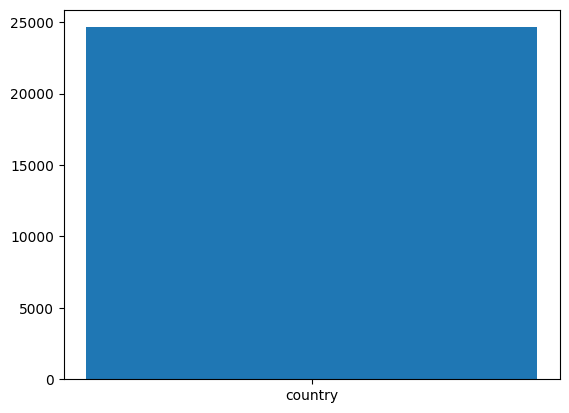

In [ ]:
w=df['country'].value_counts()
plt.bar(['country'],w.values);


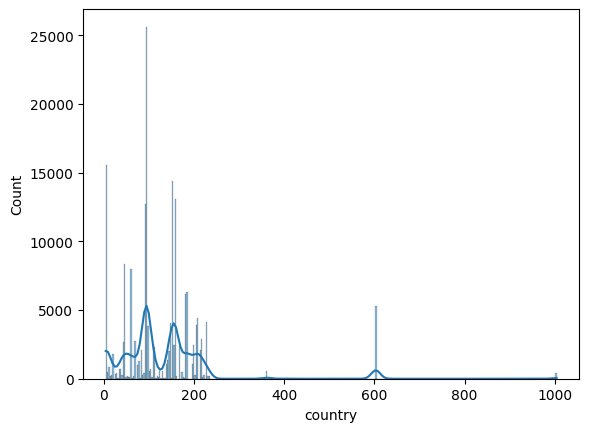

In [ ]:
sns.histplot(df['country'], kde=True)   #Kernel Density Estimation
plt.show()


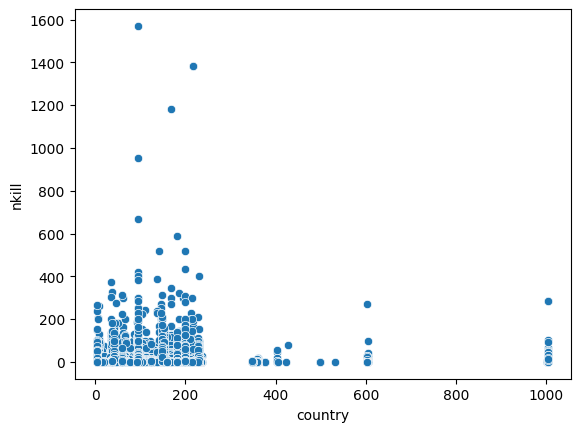

In [ ]:
# İki kolon arasında əlaqə (scatter plot)
sns.scatterplot(x='country', y='nkill', data=df)
plt.show()

In [ ]:
# # Korrelyasiya matrisini çək
# corr_matrix = df[['country','region','country_txt']].corr()
# sns.heatmap(corr_matrix, annot=True, cmap='autumn')
# plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
country_killed = df.groupby('country')['nkill'].sum().reset_index()

<ipython-input-10-2c1ee2e94ac1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='nkill', y='country', data=country_killed, palette='viridis')


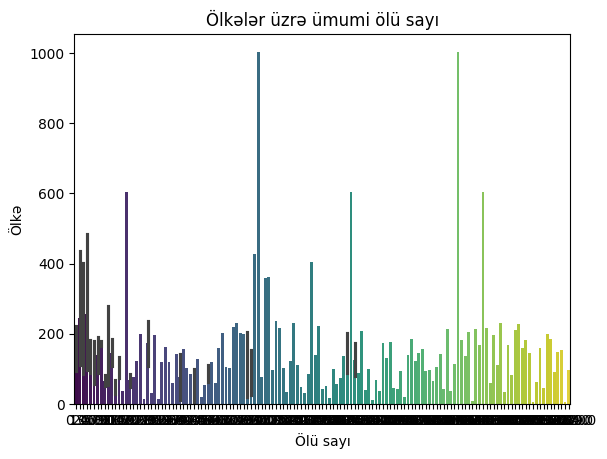

In [ ]:
sns.barplot(x='nkill', y='country', data=country_killed, palette='viridis')
plt.title('Ölkələr üzrə ümumi ölü sayı')
plt.xlabel('Ölü sayı')
plt.ylabel('Ölkə')
plt.show()

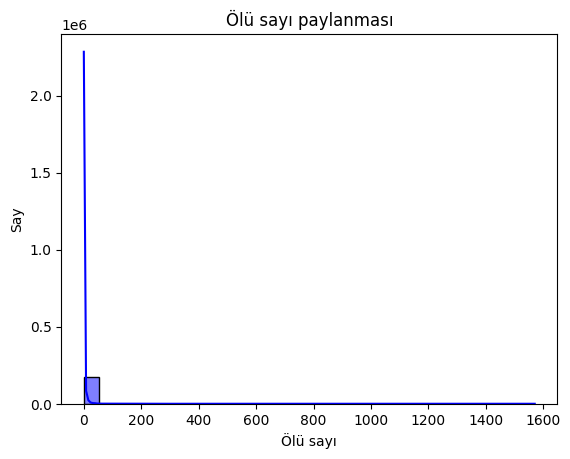

In [ ]:
sns.histplot(df['nkill'], kde=True, bins=30, color='blue')
plt.title('Ölü sayı paylanması')
plt.xlabel('Ölü sayı')
plt.ylabel('Say')
plt.show()

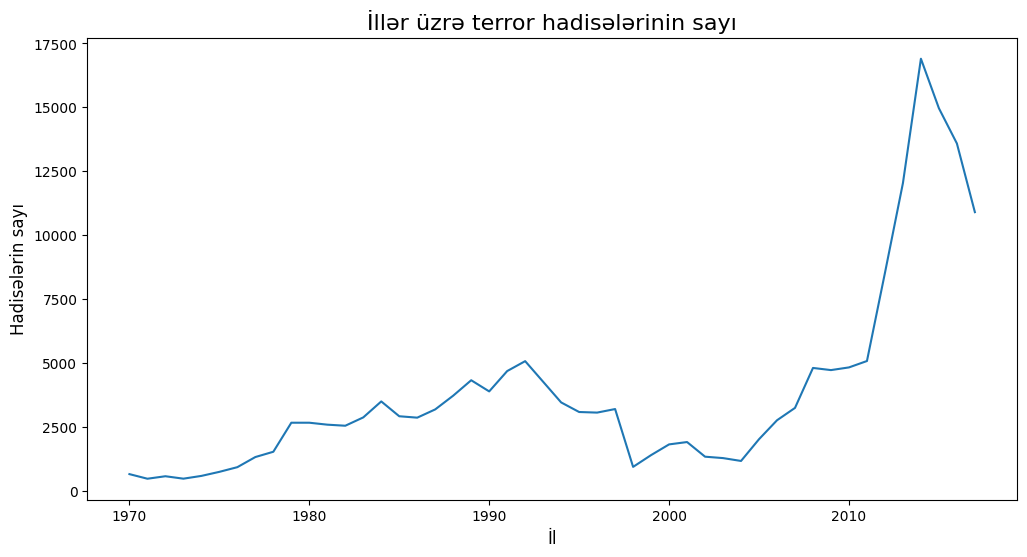

In [ ]:
yearly_attacks = df.groupby('iyear').size()

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_attacks.index, y=yearly_attacks.values)
plt.title('İllər üzrə terror hadisələrinin sayı', fontsize=16)
plt.xlabel('İl', fontsize=12)
plt.ylabel('Hadisələrin sayı', fontsize=12)
plt.show()


<ipython-input-13-75240b0e2603>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_attacks.values, y=region_attacks.index, palette='coolwarm')


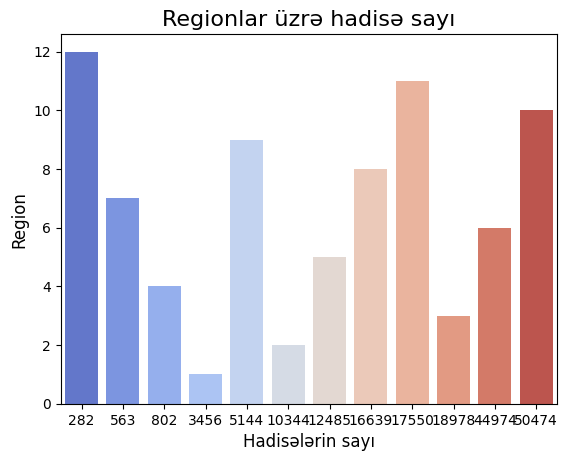

In [ ]:
region_attacks = df['region'].value_counts()

sns.barplot(x=region_attacks.values, y=region_attacks.index, palette='coolwarm')
plt.title('Regionlar üzrə hadisə sayı', fontsize=16)
plt.xlabel('Hadisələrin sayı', fontsize=12)
plt.ylabel('Region', fontsize=12);
plt.show();

<ipython-input-14-623c05faf69d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_attacks.values, y=country_attacks.index, palette='autumn')


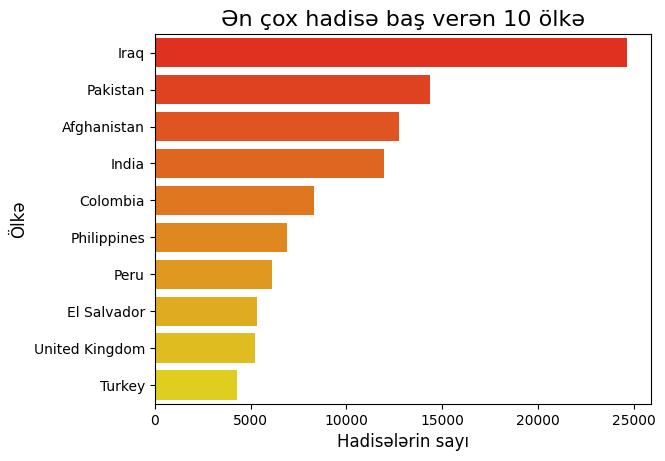

In [ ]:
country_attacks = df['country_txt'].value_counts().head(10)

sns.barplot(x=country_attacks.values, y=country_attacks.index, palette='autumn')
plt.title('Ən çox hadisə baş verən 10 ölkə', fontsize=16)
plt.xlabel('Hadisələrin sayı', fontsize=12)
plt.ylabel('Ölkə', fontsize=12)
plt.show();